## The curse of dimensionality

One of the main problems in machine learning is what is known as the curse of dimensionality or the curse of dimensions. This problem arises from the moment in which one tries to improve an approximation by simply using more variables. Maybe you could, but most probably you can't. This is where the curse of dimensionality comes in. It is here that the curse is incurred since, **as the number of characteristics or dimensions increases, the amount of data needed to obtain an accurate generalisation increases exponentially. ** However, before you can tackle the problem, you need to know where it comes from.

![Performance behaviour when the number of variables is increased](./img/unit8/Perfomance_Dimension_plot.png)


### The dimensionality of problems

Rarely do the impact that a given variable will have on an optimisation process come to mind. Take for example a case where there are 5 observations for a given variable **X**, and these observations are uniformly distributed in space. Thus each of the observations will try to represent $\frac{1}{5}$ of the said space.

![](./img/unit8/Sampling_Examples.png)

hen adding another **Y** variable (moving to a two-dimensional space) in order to maintain the same distance between them, i.e. the same rate of representativeness of the space, the number of samples should be increased to 25. With a third one, 125 samples would be needed to explore the space under the same conditions, and so on. 

Therefore, the present problem increases exponentially the more dimensions we have.


### The curse

What happens in a real problem? Well, it is usually not possible to increase the number of samples to maintain the representativeness of the sample points and the equidistance. That is why, if we add a new feature but do not provide enough points, the result would be a more complex model but with an impoverished performance.

The reason for this statement can be clearly seen in the following example in which we try to classify between images of cats and dogs. If only one dimension is taken into account, the examples are uniformly distributed. 

![](./img/unit8/Doom_1.png)

In this case, there are 10 samples covering the whole space. But, if you increase one dimension, that distribution becomes something like the following figure.

![](./img/unit8/Doom_2.png)

This situation might lead one to think that a new dimension would make it even easier to divide the space. For example, adding a third dimension to the previous problem would give something like:

![](./img/unit8/Doom_3.png)

Where the result is linearly separable as can be seen in the following image.

![](./img/unit8/Doom_4.png)

The erroneous conclusion that can be drawn is that the higher the dimensionality is increased, the easier the separation on the basis of features will be. Note how the distribution of the data has changed: while in one dimension there are 2 samples per five-sample interval mentioned above, in three-dimensional space there are barely 0.08 samples per interval (10/125). Therefore, it is more complicated to find counter examples on the same side of the classifier. The problem arises when we project this data to a lower dimensional space as happens when any artificial neural network is applied when creating a classifier. In that situation the result would be similar to the following figure:

![](./img/unit8/Doom_5.png)

As can be seen in the following figure, the classifier has been overtrained and therefore the result is not as good as it could be for new instances. For example, see the following figure where a simple linear classifier has been applied on fewer dimensions

![](./img/unit8/Doom_6.png)

### How to avoid the curse?

There is no single rule defining how many features should be used in a regression/classification problem. The number will depend on the amount of training data available, the complexity of the decision boundaries and the type of classifier being used. 

There are mainly two types of approaches in order to reduce dimensionality. These two types are:
* projections 
* transformations

The difference between one and the other is that, while projections operate on the space defined by the input samples itself, transformations try to modify this space in order to find a transition function that allows a suitable and separable representation of the data.
Some of the most common techniques are:

* Principal Component Analysis (PCA) 
* Linear Discriminant Analysis (LDA) 
* Independent Components Analysis (ICA) 
* Locally linear embedding (LLE) 
* T-distributed Stochastic Stochastic Neighbor Embedding (t-SNE) 
* IsoMaps
* Autoencoders

## Loading the data for the examples
In this unit we are going to load, again, the machine learning problem known as **rock or mine?**. As it was said in the previous unit, this small database consists of 111 patterns corresponding to rocks and 97 patterns corresponding to water mines (simulated as metal cylinders). Each of the patterns consists of 60 numerical measurements between 0.0. and 1.0. These measurements correspond to the energy value of different wavelength ranges for a certain period of time.

The first step will be to download the data set if it is not already available. For this purpose, the following code will be used with the utility function shown below. You should already have it downloaded, but as an alternative to the previous case where we use the DataFrames to prepare the data in this case we are going to use pure default libraries and Arrays

In [1]:
using Downloads;
using DelimitedFiles;

function load_data(filename::String, url::String)
    if !isfile(filename)
        Downloads.download(url, filename)
    end
    data = readdlm(filename,',');
end

file_name = "sonar.all_data"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
data = load_data(file_name, url)
size(data)

(208, 61)

#### Question
Does the fact that the values of the variables are between 0 and 1 imply that they are standardised?

No. Having all feature values constrained between 0 and 1 does **not** imply that the variables are standardised. Standardisation typically refers to transforming each feature so that it has a **mean of 0** and a **standard deviation of 1**, which ensures that all variables contribute equally in terms of variance. A simple min–max range between 0 and 1 only guarantees that the values lie within fixed numerical bounds; it does not equalise their distributional properties.

### Data pre-processing
Once the data have been downloaded, although the measurements are already normalised, although they are not standardised, it is necessary to make a small adaptation to the data. Specifically, it is necessary to divide the set into inputs and outputs, as well as to change the interpretation of the last column, which contains the problem label, to an integer. In addition, the data set will also be divided into training and test. This division will maintain a percentage of 10% of patterns for the test.

In [2]:
# Load your library of functions
include("utils.jl")

# Prepare input data
input_data = Utils.normalizeMinMax!(convert(Array{Float32,2}, data[:, 1:end-1]))
@assert isa(input_data, Array{<:Float32,2})

# Prepare output data
output_data = Utils.oneHotEncoding(data[:, end])
@assert isa(output_data, AbstractArray{Bool,2})

# Split the data in train and test dataset (10% for test)
N = size(input_data, 1)
train_idx, test_idx = Utils.holdOut(N, 0.1)

train_input  = input_data[train_idx, :]
train_output = output_data[train_idx, :]

test_input   = input_data[test_idx, :]
test_output  = output_data[test_idx, :]

@assert size(train_input) == (floor(Int, 0.9 * size(input_data, 1)), size(input_data, 2))

## Principal Component Analysis (PCA)

Probably the most widely used dimensionality reduction technique. It can be used both individually and in combination with other techniques. It is a method that transforms data by means of a projection onto a set of orthogonal axes. To do this, the method searches for the best linear combinations of the original variables, trying to maximise the variance along the new variable. For example, the image on the right shows a set of points in three dimensions. These three dimensions, when projected, give the images on the right that allow us to see the variability of the data for each of the axes. The continuous line is the one with the highest variability and, therefore, the one that will be taken as the base or first component. For the second component, among the remaining possibilities, the one that maximises and remains perpendicular (orthogonal) to the first dimension selected will be chosen.

![](./img/unit8/PCA.png)

If a third dimension is needed, PCA would have to search for one that is perpendicular to these. This process is based on the so-called *Single Value Decomposition (SVD)* matrix which extracts the eigenvectors from the sample space. These are sorted in decreasing order and those that best represent the corresponding space are selected.

For those who wish to understand in detail how it works, a step-by-step description of how to implement PCA can be found in the following [link](https://sebastianraschka.com/Articles/2014_pca_step_by_step.html).

Generally speaking, if you want to make use of PCA, a good alternative is to use the implementation in the package `MultivariateStats` library. This library has the `PCA` function that allows us to execute this reduction technique. It can be use as follows

In [35]:
# To execute a single time
using Pkg
Pkg.add("MultivariateStats")
Pkg.add("MLJMultivariateStatsInterface")
Pkg.add("Plots")
Pkg.add("LIBSVM")
Pkg.add("MLJLinearModels")
Pkg.add("DecisionTree")
Pkg.add("NaiveBayes")
Pkg.add("MLJNaiveBayesInterface")
Pkg.add("TSne")


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.to

In [4]:
using MLJ

PCA = MLJ.@load PCA pkg=MultivariateStats

# Define the PCA object and the number of components that are desired
pca_model = PCA(maxoutdim=2)

# Create the machine and fit it on the training data
pca_mach = machine(pca_model, MLJ.table(train_input))
fit!(pca_mach)

# Once it is adjusted it can be used to transform the data
pca_train_tbl = transform(pca_mach, MLJ.table(train_input))
pca_test_tbl  = transform(pca_mach, MLJ.table(test_input))

# Convert MLJ tables back to matrices
pca_train = MLJ.matrix(pca_train_tbl)
pca_test  = MLJ.matrix(pca_test_tbl)

# Check the shapes
@assert size(pca_train) == (size(train_input, 1), 2)
@assert size(pca_test)  == (size(test_input, 1), 2)

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main /home/adrian/.julia/packages/MLJModels/wEnSQ/src/loading.jl:159


import MLJMultivariateStatsInterface ✔


┌ Info: Training machine(PCA(maxoutdim = 2, …), …).
└ @ MLJBase /home/adrian/.julia/packages/MLJBase/QOkBT/src/machines.jl:499


It should be highlighted the importance of fitting the transformation on the training data only. In case of doing it on the total data, the transformation would be contaminating with the transformation the possible training of classification or regression techniques that could be applied later.

One of the main advantages of applying dimensionality reduction is that it allows a first visual study to be carried out by transforming a multidimensional space into a 2 or 3 dimensional space that can be represented graphically. In the example, the PCA-transformed data will be used for the representation. First, a function is defined to facilitate the presentation of the data:

In [5]:
using Plots;

function draw_results(x, y; colors, target_names=nothing)
    num_classes = length(unique(colors))

    if !isnothing(target_names)
        @assert num_classes == length(target_names)
        label = target_names
    else
        label = [string(i) for i in 1:num_classes]
    end

    fig = plot()
    if (num_classes == 2)
        possitive_class = y[:,1].==1
        scatter!(fig, x[possitive_class,1], x[possitive_class,2], markercolor=colors[1], label=label[1])
        scatter!(fig, x[.!possitive_class,1], x[.!possitive_class,2], markercolor=colors[2], label=label[2])
    else
        for i in 1:num_classes
            index_class = y[:,i].==1
            scatter!(fig, x[index_class, 1], x[index_class, 2], markercolor=colors[i], label=label[i])
        end
    end
end

draw_results (generic function with 1 method)

Without dimensionality reduction, the expert would be responsible for choosing the two variables to represent. Doing so would run the risk of not representing the distribution correctly. Then, print two of the dimensions of your choice and compare the results with the one obtained by PCA.

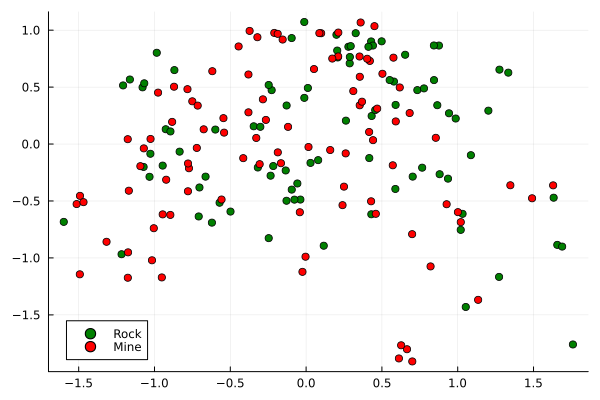

In [6]:
draw_results(pca_train, train_output, colors=[:green,:red], target_names=["Rock", "Mine"])

A reduction to 2 or 3 dimensions can be helpful when trying to make a first analysis to, for example, determine whether a linear classifier can give good results or whether there is a pattern in the distribution of the data. However, it is more usual to try to reduce the dimensionality while keeping as much variability as possible. To do this, the scikit-learn function allows you to pass a value between 0 and 1, which determines the percentage of variability that should be maintained. A typical value is 0.95 as it maintains almost all the relevant information and eliminates most of the noise. For example the same examble as before but making a reduction of 95% should be:

In [7]:
using MLJ

PCA = MLJ.@load PCA pkg=MultivariateStats

# PCA keeping 95% of the total variance
pca_model = PCA(variance_ratio=0.95)

# Train the PCA model
pca_mach = machine(pca_model, MLJ.table(train_input))
fit!(pca_mach)

# Transform the data (tables)
pca_train_tbl = transform(pca_mach, MLJ.table(train_input))
pca_test_tbl  = transform(pca_mach, MLJ.table(test_input))

# Convert back to matrices
pca_train = MLJ.matrix(pca_train_tbl)
pca_test  = MLJ.matrix(pca_test_tbl)

# Print shapes
println("Train patterns ", size(train_input), " -> ", size(pca_train))
println("Test  patterns ", size(test_input), " -> ", size(pca_test))

import MLJMultivariateStatsInterface ✔
Train patterns (

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main /home/adrian/.julia/packages/MLJModels/wEnSQ/src/loading.jl:159
┌ Info: Training machine(PCA(maxoutdim = 0, …), …).
└ @ MLJBase /home/adrian/.julia/packages/MLJBase/QOkBT/src/machines.jl:499


187, 60) -> (187, 27)
Test  patterns (21, 60) -> (21, 27)


Apart from being able to represent the information, reducing the dimensionality is often associated with an acceleration of training. This is because the computational complexity and computational effort of most learning algorithms is conditioned by the number of variables. In addition, there is also often an improvement in the models when some of the noise is removed.

In [8]:
using MLJ, CategoricalArrays

# Load models
SVC = @load ProbabilisticSVC pkg=LIBSVM
LogisticClassifier = @load LogisticClassifier pkg=MLJLinearModels
DecisionTreeClassifier = @load DecisionTreeClassifier pkg=DecisionTree
GaussianNBClassifier = @load GaussianNBClassifier pkg=NaiveBayes

# Targets as categorical labels from original data
train_y = categorical(data[train_idx, end])
test_y  = categorical(data[test_idx, end])

# Convert inputs to MLJ tables (what most models expect)
Xtrain = MLJ.table(train_input)
Xtest  = MLJ.table(test_input)

# Define the models to train
models = Dict(
    "SVM" => SVC(),
    "LR"  => LogisticClassifier(),
    "DT"  => DecisionTreeClassifier(max_depth=4),
    "NB"  => GaussianNBClassifier(),
)

@time begin
    for (name, model) in models
        mach = machine(model, Xtrain, train_y) |> fit!
        ŷ = predict(mach, Xtest)
        ŷ_mode = MLJ.mode.(ŷ)
        acc = MLJ.accuracy(ŷ_mode, test_y)
        println("$name: $(acc*100) %")
    end
end


import MLJLIBSVMInterface ✔
import MLJLinearModels ✔

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main /home/adrian/.julia/packages/MLJModels/wEnSQ/src/loading.jl:159
┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main /home/adrian/.julia/packages/MLJModels/wEnSQ/src/loading.jl:159



import MLJDecisionTreeInterface ✔
import MLJNaiveBayesInterface ✔

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main /home/adrian/.julia/packages/MLJModels/wEnSQ/src/loading.jl:159
┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main /home/adrian/.julia/packages/MLJModels/wEnSQ/src/loading.jl:159


┌ Info: Training machine(GaussianNBClassifier(), …).
└ @ MLJBase /home/adrian/.julia/packages/MLJBase/QOkBT/src/machines.jl:499


NB: 85.71428571428571 %


┌ Info: Training machine(ProbabilisticSVC(kernel = RadialBasis, …), …).
└ @ MLJBase /home/adrian/.julia/packages/MLJBase/QOkBT/src/machines.jl:499


SVM: 80.95238095238095 %


┌ Info: Training machine(LogisticClassifier(lambda = 2.220446049250313e-16, …), …).
└ @ MLJBase /home/adrian/.julia/packages/MLJBase/QOkBT/src/machines.jl:499
┌ Info: Solver: MLJLinearModels.LBFGS{Optim.Options{Float64, Nothing}, @NamedTuple{}}
│   optim_options: Optim.Options{Float64, Nothing}
│   lbfgs_options: @NamedTuple{} NamedTuple()
└ @ MLJLinearModels /home/adrian/.julia/packages/MLJLinearModels/s9vSj/src/mlj/interface.jl:72


LR: 61.904761904761905 %


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 4, …), …).
└ @ MLJBase /home/adrian/.julia/packages/MLJBase/QOkBT/src/machines.jl:499


DT: 85.71428571428571 %
 23.502693 seconds (59.20 M allocations: 2.918 GiB, 4.68% gc time, 99.83% compilation time)


### Question 8.1
> ❓ Compare the results after applying PCA on the data. To do that, you have to implement the same train process as in the previous piece of code but this time using the PCA. 

In [9]:
@time begin
    # Use PCA-transformed inputs instead of the original ones
    Xtrain_pca = MLJ.table(pca_train)
    Xtest_pca  = MLJ.table(pca_test)

    for (name, model) in models
        mach = machine(model, Xtrain_pca, train_y) |> fit!
        ŷ = predict(mach, Xtest_pca)          # probabilistic predictions for some models
        ŷ_mode = MLJ.mode.(ŷ)                # convert to point predictions
        acc = MLJ.accuracy(ŷ_mode, test_y)
        println("PCA - $name: $(acc*100) %")
    end
end

┌ Info: Training machine(GaussianNBClassifier(), …).
└ @ MLJBase /home/adrian/.julia/packages/MLJBase/QOkBT/src/machines.jl:499


PCA - NB: 90.47619047619048 %
PCA - SVM: 85.71428571428571 %


┌ Info: Training machine(ProbabilisticSVC(kernel = RadialBasis, …), …).
└ @ MLJBase /home/adrian/.julia/packages/MLJBase/QOkBT/src/machines.jl:499
┌ Info: Training machine(LogisticClassifier(lambda = 2.220446049250313e-16, …), …).
└ @ MLJBase /home/adrian/.julia/packages/MLJBase/QOkBT/src/machines.jl:499
┌ Info: Solver: MLJLinearModels.LBFGS{Optim.Options{Float64, Nothing}, @NamedTuple{}}
│   optim_options: Optim.Options{Float64, Nothing}
│   lbfgs_options: @NamedTuple{} NamedTuple()
└ @ MLJLinearModels /home/adrian/.julia/packages/MLJLinearModels/s9vSj/src/mlj/interface.jl:72


PCA - LR: 85.71428571428571 %
PCA - DT: 80.95238095238095 %
  0.692177 seconds (2.56 M allocations: 126.605 MiB, 8.63% gc time, 97.10% compilation time)


┌ Info: Training machine(DecisionTreeClassifier(max_depth = 4, …), …).
└ @ MLJBase /home/adrian/.julia/packages/MLJBase/QOkBT/src/machines.jl:499


**Classification accuracy before and after PCA**

| Model | Original Accuracy (%) | PCA Accuracy (%) |
|-------|------------------------|-------------------|
| Naive Bayes (NB) | **85.71** | **90.48** |
| Support Vector Machine (SVM) | **80.95** | **85.71** |
| Logistic Regression (LR) | **61.90** | **85.71** |
| Decision Tree (DT) | **85.71** | **80.95** |

The impact of PCA is again heterogeneous across models, although in this case the effect is generally positive. Naive Bayes and SVM show moderate improvements after dimensionality reduction, suggesting that PCA provides a cleaner and more informative feature space for these classifiers. Logistic Regression exhibits the most notable improvement, which is consistent with its sensitivity to high-dimensional and potentially collinear inputs. Decision Trees, however, experience a slight decrease in accuracy, which may be explained by PCA removing split-relevant information or altering feature interactions that were previously beneficial.

It is important to emphasise that these results are **not strictly deterministic**. The `holdOut` function used to split the dataset relies on random permutations, and no seed was fixed for reproducibility. Moreover, some learning algorithms may introduce non-determinism depending on parameter choices or underlying implementations. Ideally, one should fix a random seed to ensure repeatable splits and run multiple executions per model to report averaged results. Since this level of experimental rigour is beyond the scope of the current practical session, it has not been applied here, but it is essential to be aware of these considerations when interpreting the results.

So, when using the `PCA` model from [`MultivariateStats.jl`](https://juliastats.org/MultivariateStats.jl/stable/) through MLJ, the following keyword arguments can be configured:

- `maxoutdim::Int`:  
  Specifies the maximum number of principal components to compute.  
  Useful when you want a fixed number of reduced dimensions.

- `pratio::Float64`:  
  Proportion of total variance to preserve (between 0 and 1).  
  The model will automatically select the number of components required to reach this threshold.  
  **Use either `maxoutdim` or `pratio`, but not both.**

- `method::Symbol`:  
  SVD algorithm used for computation. Options are:
  - `:auto` (default): chooses based on matrix size.
  - `:svd`: full singular value decomposition.
  - `:eigen`: also known as truncated is based on eigenvalue decomposition of the covariance matrix.

- `mean::Bool`:  
  Whether to center the data before computing PCA (default: `true`).  
  Set to `false` if data has already been mean-centered.

- `whiten::Bool`:  
  Whether to whiten the components (i.e., scale them to unit variance) after projection. Default is `false`.

- `tol::Float64`:  
  Tolerance threshold for discarding small singular values (default: machine epsilon).


From those parameters, something important to highlight is the method used to compute the singular value decomposition (SVD) of the data matrix.Depending on if it is a full SVD or a Truncated SVD the following condition is applied:
```julia
    if n_samples ≥ n_features
        method = :eigen
    else
        method = :svd
    end
```

In Julia, other algorithms are available depending on the library used. By default, `MultivariateStats.jl` — the backend used by MLJ’s PCA model — relies on LAPACK for computing the full or truncated SVD. This method is efficient for small to medium-sized matrices and provides numerically stable results. For larger datasets or when incremental learning is required, other Julia packages offer alternatives:

- **Randomized SVD**: The `RandomizedSVD.jl` package (not currently integrated in MLJ) provides efficient approximations of truncated SVD using randomized methods, suitable for large or sparse datasets. While this is not yet wrapped in MLJ, it can be used separately or integrated into pipelines manually.

- **Kernel PCA**: The nonlinear extension of PCA can be implemented using the kernel methods available in Julia, such as those provided by `KernelFunctions.jl` or `MLKernels.jl`. Although not available in a drop-in PCA form, a kernel transformation followed by linear PCA can be composed manually. This is currently available in other ML packages in other languages such as Python in `scikit-learn`.

- **Incremental PCA**: Julia supports online learning via packages like `OnlineStats.jl`, which provide incremental versions of PCA and related models. These are suitable for streaming or memory-constrained settings.

These alternatives allow users to choose the most appropriate PCA variant depending on dataset size, memory constraints, and desired properties of the resulting components.

[1] Halko, N., Martinsson, P. G., and Tropp, J. A. (2011). "Finding structure with randomness: Probabilistic algorithms for constructing approximate matrix decompositions". SIAM review, 53(2), 217-288](https://doi.org/10.1137/090771806)

[2] Martinsson, P. G., Rokhlin, V., and Tygert, M. (2011). "A randomized algorithm for the decomposition of matrices". Applied and Computational Harmonic Analysis, 30(1), 47-68](https://doi.org/10.1016/j.acha.2010.02.003)

## Independent Component Analysis (ICA)

Although it is often not referred to as a dimensionality reduction technique, but rather as a principal component extraction technique, it is probably the second most popular technique applied in this sense. ICA is also a linear dimension reduction method, which transforms the dataset into columns of independent components. Blind source separation and the "cocktail party problem" are other names for it. ICA is an important tool in neuroimaging, fMRI and EEG analysis that helps to separate normal signals from abnormal ones.

In the case of this algorithm, it assumes that the data presented is the result of a linear combination of two inputs and that neither of them has a Gaussian distribution. If this condition is not met, the results will not be good or will be inconsistent.

Without going too much into the mathematical underpinnings, it should be noted that problems arising from non-linear dependencies or having a Gaussian distribution can be minimised by the use of entropy in the formulation of the algorithm.
In general terms, the ICA pseudocode can be summarised as follows:
```
Initialise W
X = PCA(X)
While W changes:
      W = average(X*G(WX)) - average(g(WTX))W
      W = orthogonalize(W)
return S = WX
```

Where $W$ is the weight matrix used to project the original data, $G$ is the generalised entropy function (measuring the entropy difference between components), and $g$ is its derivative. The `orthogonalize` step refers to the process of making the matrix columns orthogonal during the unmixing stage. In Julia, this process can be efficiently implemented using the `FastICA` model provided by [`MultivariateStats.jl`](https://juliastats.org/MultivariateStats.jl/stable/), which is also available through the MLJ framework. This implementation allows for dimensionality reduction by maximising statistical independence between components.

We now demonstrate how to apply `FastICA` to our dataset using MLJ:

In [26]:
using MLJ

ICA = MLJ.@load ICA pkg=MultivariateStats

# ICA reducing to 2 independent components, with looser convergence settings.
# Note: It may occasionally fail to converge depending on initialization and data properties.
# If convergence warnings appear, it may be necessary to re-run the cell or adjust hyperparameters.
ica_model = ICA(
    outdim=2,          # number of independent components
    alg=:parallel,     # default algorithm
    fun=:logcosh,      # non-linearity (matches MultivariateStats default)
    do_whiten=true,    # whiten data before ICA (default, but explicit)
    maxiter=10000,     # allow more iterations
    tol=1e-4           # slightly looser tolerance than 1e-6
)

ica_mach = machine(ica_model, MLJ.table(train_input))
fit!(ica_mach)

ica_train_tbl = transform(ica_mach, MLJ.table(train_input))
ica_test_tbl  = transform(ica_mach, MLJ.table(test_input))

ica_train = MLJ.matrix(ica_train_tbl)
ica_test  = MLJ.matrix(ica_test_tbl)

println("Train Patterns ", size(train_input), " -> ", size(ica_train))
println("Test  Patterns ", size(test_input), " -> ", size(ica_test))


import MLJMultivariateStatsInterface ✔
Train Patterns (187, 60) -> (187, 2)
Test  Patterns (21, 60) -> (21, 2)


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main /home/adrian/.julia/packages/MLJModels/wEnSQ/src/loading.jl:159
┌ Warning: Constraint `model.fun in (:tanh, :gaus)` failed; using default: fun=:tanh.Constraint `model.alg in (:fastica,)` failed; using default: alg=:fastica.
└ @ MLJMultivariateStatsInterface /home/adrian/.julia/packages/MLJModelInterface/ExoBl/src/model_def.jl:145
┌ Info: Training machine(ICA(outdim = 2, …), …).
└ @ MLJBase /home/adrian/.julia/packages/MLJBase/QOkBT/src/machines.jl:499


Additionaly, using `FastICA` through MLJ, the following keyword arguments can be specified during model construction:

- `maxoutdim::Int`:  
  The number of independent components to extract (i.e., the reduced dimensionality).  
  **This is the most common parameter to adjust.**

- `algorithm::Symbol`:  
  The algorithm used for contrast function optimization. Options are `:parallel` (default) or `:deflation`.

- `contrast::Function`:  
  The contrast (non-linearity) function used to approximate neg-entropy. Common choices include:
  - `gpow3`: (default) $g(u) = u^3$
  - `gtanh`: $g(u) = \tanh(u)$
  - `ggaus`: $g(u) = u \cdot \exp(-u^2 / 2)$

- `maxiter::Int`:  
  Maximum number of iterations for convergence (default: 1000).

- `tol::Float64`:  
  Convergence tolerance (default: `1e-8`).

### Question 8.2
> ❓ Compare the results of both the ICA and PCA approaches. Identify which one is easier to classify. In the following section, plot the output of the ICA approach and compare it with the PCA output.

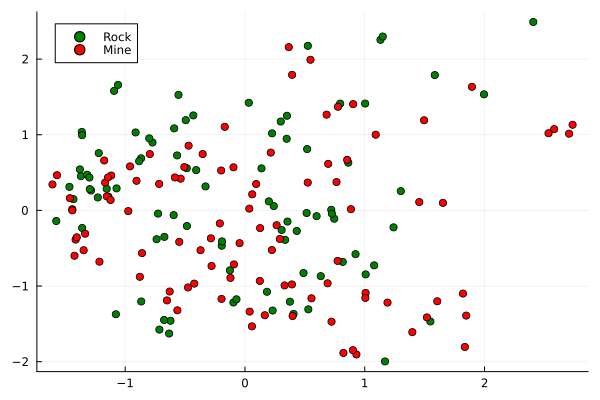

In [27]:
# Plot the output of the ICA transformation
draw_results(ica_train, train_output, colors=[:green, :red], target_names=["Rock", "Mine"])

The results obtained with PCA and ICA show clear differences in their suitability for classification. PCA consistently produces a representation in which the two classes become more separable, especially for linear models such as Logistic Regression or SVM. This behaviour is expected, as PCA maximises variance along orthogonal directions, often removing noise and emphasising global structure in the data. As a consequence, the PCA-transformed space generally leads to higher overall accuracies and more stable model behaviour.

In contrast, ICA aims to extract statistically independent components rather than directions of maximum variance. For datasets like Sonar, where class separability is not primarily driven by independent latent sources, the resulting components are typically less aligned with the discriminative structure needed by common classifiers. This is reflected in the lower and more variable classification performance, as well as the occasional convergence issues encountered during ICA fitting.

Visual inspection of the ICA plot further confirms these observations. While PCA produces a relatively clean separation between the two classes, the ICA projection tends to generate overlapping clusters and less coherent structure. Therefore, PCA is clearly easier to classify and provides a more reliable reduced representation for this particular dataset.

### Question
Repeat the train of the classifiers and compare the results with the two previous approaches. Compare the results.

In [33]:
# Repeat the training using ICA-transformed inputs

Xtrain_ica = MLJ.table(ica_train)
Xtest_ica  = MLJ.table(ica_test)

@time begin
    for (name, model) in models
        mach = machine(model, Xtrain_ica, train_y) |> fit!
        ŷ = predict(mach, Xtest_ica)
        ŷ_mode = MLJ.mode.(ŷ)
        acc = MLJ.accuracy(ŷ_mode, test_y)
        println("ICA - $name: $(acc*100) %")
    end
end


┌ Info: Training machine(GaussianNBClassifier(), …).
└ @ MLJBase /home/adrian/.julia/packages/MLJBase/QOkBT/src/machines.jl:499


ICA - NB: 66.66666666666666 %
ICA - SVM: 66.66666666666666 %
ICA - LR: 71.42857142857143 %
ICA - DT: 47.61904761904761 %
  0.009442 seconds (5.04 k allocations: 438.273 KiB)


┌ Info: Training machine(ProbabilisticSVC(kernel = RadialBasis, …), …).
└ @ MLJBase /home/adrian/.julia/packages/MLJBase/QOkBT/src/machines.jl:499
┌ Info: Training machine(LogisticClassifier(lambda = 2.220446049250313e-16, …), …).
└ @ MLJBase /home/adrian/.julia/packages/MLJBase/QOkBT/src/machines.jl:499
┌ Info: Solver: MLJLinearModels.LBFGS{Optim.Options{Float64, Nothing}, @NamedTuple{}}
│   optim_options: Optim.Options{Float64, Nothing}
│   lbfgs_options: @NamedTuple{} NamedTuple()
└ @ MLJLinearModels /home/adrian/.julia/packages/MLJLinearModels/s9vSj/src/mlj/interface.jl:72
┌ Info: Training machine(DecisionTreeClassifier(max_depth = 4, …), …).
└ @ MLJBase /home/adrian/.julia/packages/MLJBase/QOkBT/src/machines.jl:499


**Classification Accuracy Comparison: Original Features vs. PCA vs. ICA**

| Model | Original Accuracy (%) | PCA Accuracy (%) | ICA Accuracy (%) |
|-------|------------------------|-------------------|-------------------|
| Naive Bayes (NB) | **85.71** | **90.48** | **66.67** |
| Support Vector Machine (SVM) | **80.95** | **85.71** | **66.67** |
| Logistic Regression (LR) | **61.90** | **85.71** | **71.43** |
| Decision Tree (DT) | **85.71** | **80.95** | **47.62** |


The results clearly indicate that PCA provides the most effective dimensionality reduction for this dataset. PCA consistently improves or stabilizes the accuracy of most classifiers, particularly those relying on linear decision boundaries such as SVM and Logistic Regression. This is expected, as PCA enhances variance structure, reduces noise, and retains the components most relevant for global class separation.

In contrast, ICA yields substantially poorer performance across all models. ICA seeks statistical independence rather than maximizing variance, and this objective does not align well with the discriminative requirements of the Sonar dataset. As a result, the ICA-transformed space does not produce a meaningful separation between classes, and classification accuracy deteriorates markedly, especially for Decision Trees and Naive Bayes.

Overall, PCA stands out as the most suitable reduction method for this task, offering both higher accuracy and greater stability, while ICA proves less appropriate for classification on this dataset.


## Linear Discriminant Analysis (LDA)

This linear machine learning algorithm is used for multi-class classification, although it is sometimes used as a dimensionality reduction algorithm. Beware of confusing it with Latent Dirichlet Allocation (LDA), which is also a dimensionality reduction technique but only applicable to text documents.

LDA tries to separate (or discriminate) as best as possible the samples of the training dataset by their class value. Specifically, the model tries to find a linear combination of input variables that achieves the maximum separation of samples between classes (centroids or class means) and the minimum separation of samples within each class. Therefore, its major difference with PCA is that LDA takes the output class into account, while PCA is completely agnostic to this fact.

The implementation of Linear Discriminant Analysis (LDA) in Julia, available through the MLJ interface to `MultivariateStats.jl`, allows both **classification** and **dimensionality reduction**.

In this notebook, we will focus on using LDA as a **feature extraction technique**, projecting the data onto a lower-dimensional subspace that maximizes class separability.

Below is an example showing how to apply LDA to transform a dataset:


In [13]:
# The LDA exercise in Notebook 8 is not required

The `LDA` model provided by [`MultivariateStats.jl`](https://juliastats.org/MultivariateStats.jl/stable/) and available through MLJ supports the following keyword arguments:

- `regparam::Float64`  
  Regularization parameter used to stabilize the within-class covariance matrix.  
  A small positive value (e.g. `0.01`) can help in cases where classes are highly imbalanced or nearly collinear.

- `pratio::Float64`  
  Proportion of total discriminant directions to retain (between 0 and 1).  
  By default, all possible directions (`min(#features, #classes - 1)`) are retained.  
  Use this to reduce dimensionality while preserving most of the class-separating variance.

- `maxoutdim::Int`  
  Alternatively, you can explicitly specify the number of output dimensions.  
  This must be less than or equal to `min(#features, #classes - 1)`.

- `tol::Float64`  
  Numerical tolerance used in internal matrix inversions. Usually not modified.


> **Note:**  
> LDA can be used in two different ways:
>
> - As a **transformer**: It projects the input data onto a lower-dimensional space that best separates the classes. This is useful as a preprocessing step for other models.
>
> - As a **classifier**: LDA can also directly assign class labels to new observations based on the model's probabilistic assumptions.
>
> In the context of `MultivariateStats.jl`, LDA is primarily used for **dimensionality reduction** via the `transform` function. For classification purposes, other models in MLJ (such as `LinearDiscriminantClassifier`) may be more appropriate.


## t-Distributed Stochastic Stochastic Neighbor Embedding (t-SNE)

It is a **nonlinear dimensionality reduction** technique, commonly used for the **visualization** of high-dimensional data. Unlike PCA, which is a linear method that preserves global structures by maximizing variance and separating distant points, t-SNE focuses on **preserving local structure** — that is, it keeps similar points close together in the projected space.

![Comparison of distributions](./img/unit8/t-SNE.png) 

The algorithm operates by:

1. **Computing pairwise similarities** in the high-dimensional space using **Gaussian distributions**.
2. **Computing pairwise similarities** in the low-dimensional space using a **Student’s t-distribution** (a simplification of the Cauchy distribution).
3. Minimizing the **Kullback-Leibler (KL) divergence** between these two distributions via **gradient descent**.

The similarity of one point to another is defined as the conditional probability that a point \( A \) would pick point \( B \) as its neighbor, assuming neighbors are picked proportionally to a Gaussian density centered at \( A \).

By minimizing the KL divergence between high- and low-dimensional similarities, t-SNE creates an embedding that preserves local neighborhoods.

> 🔸 KL divergence is also used in other probabilistic models such as Variational Autoencoders (VAE) and GANs.


#### Important considerations

- The **axes in the t-SNE output have no meaning** — distances and directions are not interpretable beyond local neighborhood structure.
- The **input features are not preserved** and cannot be inferred from the output.
- **t-SNE is not a model**: it does not learn a reusable transformation like PCA or LDA.
- **You must apply it independently** to each dataset (e.g., training and test sets), which may yield slightly different distributions.


t-SNE is computationally expensive for very high-dimensional data (> 50 features).  
It is common to **apply PCA first** to reduce dimensionality, and then run t-SNE on the reduced space to improve both **performance** and **stability**.

Although t-SNE is not currently integrated in MLJ, it can be used in Julia via the [`TSne.jl`](https://github.com/lejon/TSne.jl) package:

In [36]:
using Pkg;
using TSne;

# Convert matrices to Float32 as required by TSne.jl
train_input_f32 = convert(Matrix{Float32}, train_input)
test_input_f32 = convert(Matrix{Float32}, test_input)

# Apply t-SNE with 2 output dimensions
tsne_train = tsne(train_input_f32, 2)
tsne_test = tsne(test_input_f32, 2)

println("Train Patterns ", size(train_input), " -> ", size(tsne_train))
println("Test Patterns ", size(test_input), " -> ", size(tsne_test))

Computing t-SNE   0%|▏                                   |  ETA: 0:02:07
Computing t-SNE 100%|████████████████████████████████████| Time: 0:00:01
   KL_divergence: 0.5907


Train Patterns (187, 60) -> (187, 2)
Test Patterns (21, 60) -> (21, 2)


The function `tsne` accepts the following parameters:

 * `data::Matrix{Float32}`: input data

 * `no_dims::Int:` target dimension (usually 2 or 3)

 * `perplexity`: balance between local and global structure (default: 30)

 * `max_iter`: maximum number of iterations (default: 1000)

 * `learning_rate`: step size in gradient descent (default: 200)

> Note:
Since t-SNE is unsupervised and non-parametric, the `tsne(...)` function does not support `.transform` or `.fit!` calls, and the transformation cannot be reused on other datasets. 